# Checkpoint 5: Logistic Regression
##### by: Tolba Yasmine

## Preprocessing phase:

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('titanic-passengers.csv', sep=";")
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,343,No,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,248740,13.0000,NaN,S
1,76,No,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,F G73,S
2,641,No,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,350050,7.8542,NaN,S
3,568,No,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,NaN,S
4,672,No,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,B71,S


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    object 
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(4), object(6)
memory usage: 83.7+ KB


In [4]:
data.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
data.columns.tolist()

['PassengerId',
 'Survived',
 'Pclass',
 'Name',
 'Sex',
 'Age',
 'SibSp',
 'Parch',
 'Ticket',
 'Fare',
 'Cabin',
 'Embarked']

In [6]:
pd.isnull(data).sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
data['Age'].fillna(int(data.Age.median()), inplace = True)
data.dropna(subset= ['Embarked'], inplace=True)
data['Cabin'].fillna(data.Cabin.mode()[0], inplace = True)
data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [8]:
data.drop(index= data[data['Fare']>400].index, inplace=True)

In [9]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,343,No,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,248740,13.0000,B96 B98,S
1,76,No,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,F G73,S
2,641,No,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,350050,7.8542,B96 B98,S
3,568,No,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,B96 B98,S
4,672,No,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,B71,S


## Visualization phase:

c:\Users\YsPC\AppData\Local\Programs\Python\Python37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

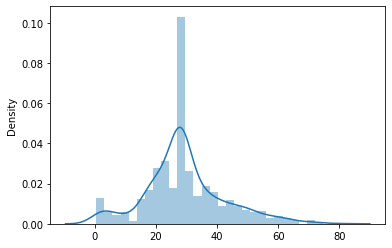

In [10]:
sns.distplot(x = data['Age'])

<AxesSubplot:xlabel='Age', ylabel='Fare'>

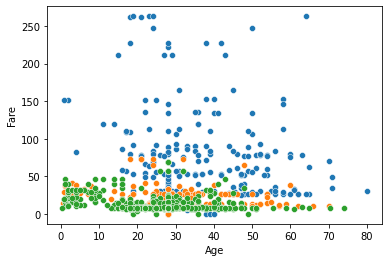

In [11]:
sns.scatterplot(x = data[data['Pclass'] == 1].Age, y = data[data['Pclass'] == 1].Fare)
sns.scatterplot(x = data[data['Pclass'] == 2].Age, y = data[data['Pclass'] == 2].Fare)
sns.scatterplot(x = data[data['Pclass'] == 3].Age, y = data[data['Pclass'] == 3].Fare)


C:\Users\YsPC\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\YsPC\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


<AxesSubplot:>

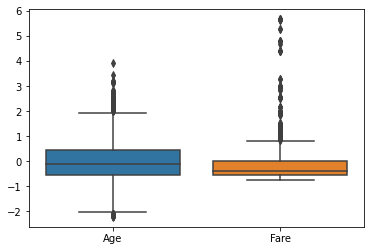

In [12]:
from sklearn.preprocessing import StandardScaler
sampled_data = data[["Age", "Fare"]]
scaler = StandardScaler()
sampled_data["Age"] = scaler.fit_transform(sampled_data[["Age"]].values)
sampled_data["Fare"] = scaler.fit_transform(sampled_data[["Fare"]].values)
sns.boxplot(data = sampled_data)

c:\Users\YsPC\AppData\Local\Programs\Python\Python37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\YsPC\AppData\Local\Programs\Python\Python37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

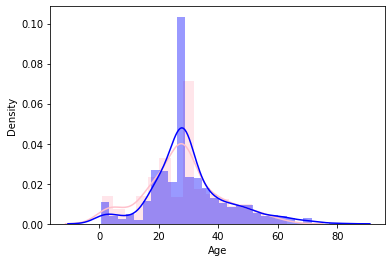

In [13]:
sns.distplot(data[data['Sex'] == 'female'].Age, color = 'pink')
sns.distplot(data[data['Sex'] == 'male'].Age, color = 'blue')



In [14]:
sliced = data[['Sex', 'Survived', 'Age']].copy()
# sliced['survived_female'] = sliced[(sliced['sex']=='female') & (sliced['survived'] == 1)].survived
# sliced['survived_male'] = sliced[(sliced['sex']=='male') & (sliced['survived'] == 1)].survived
# sliced.fillna(0, inplace=True)
# sliced.drop(['sex'], axis = 1, inplace=True)
# sliced.drop(['survived'], axis = 1, inplace=True)
mapping = {'female': 0,
        'male': 1}

sliced['Sex'] = sliced['Sex'].map(mapping)
mapping = {'No': 0,
        'Yes': 1}
sliced['Survived'] = sliced['Survived'].map(mapping)
age_sex_survival = sliced.corr()


<AxesSubplot:>

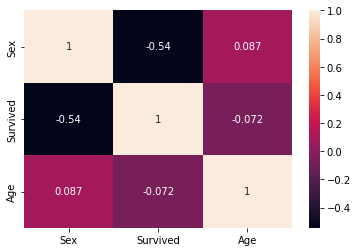

In [15]:
sns.heatmap(age_sex_survival, annot=True)

## Some more features:

c:\Users\YsPC\AppData\Local\Programs\Python\Python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Pclass', ylabel='count'>

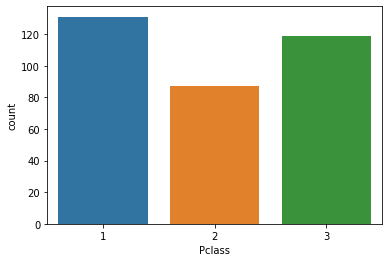

In [16]:
#does the class affect the survival?
sns.countplot(data[(data['Survived'] == 'Yes')]['Pclass'])

c:\Users\YsPC\AppData\Local\Programs\Python\Python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Embarked', ylabel='count'>

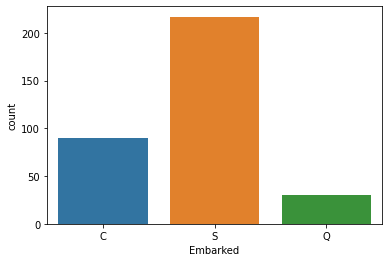

In [17]:
sns.countplot(data[(data['Survived'] == 'Yes')]['Embarked'])

## Running the function:

In [18]:
def plot_correlation_map( df ):

    corr = df.corr()

    s , ax = plt.subplots( figsize =( 12 , 10 ) )

    cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )

    s = sns.heatmap(

        corr, 

        cmap = cmap,

        square=True, 

        cbar_kws={ 'shrink' : .9 }, 

        ax=ax, 

        annot = True, 

        annot_kws = { 'fontsize' : 12 }

        )

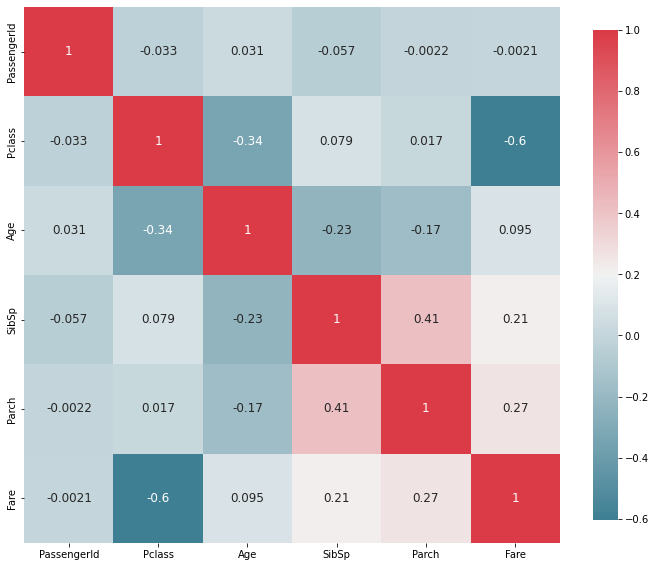

In [19]:
# running it 
plot_correlation_map(data)

#### What does it do?
##### In simple terms, this is a heatmap of the correlation matrix generated from our dataframe.
##### A correlation matrix is a symmetrical matrix, that calculates the link between each couple of columns in our dataframe.
##### As its name suggests, its utility is to determine if 2 columns of information can be related to each other, and to visualize it efficiently, a heatmap is the perfect format to get that information at a glance.

## Relation between pclass and survived

In [20]:
#calculates the average rate of survival in each class
mapping = {'No': 0,
        'Yes': 1}
data['Survived'] = data['Survived'].map(mapping)
data.groupby('Pclass').Survived.mean()

Pclass
1    0.620853
2    0.472826
3    0.242363
Name: Survived, dtype: float64

## Dropping useless columns

In [21]:
reduced_data = data.drop(['SibSp', 'Parch','Name','Cabin','PassengerId'],axis = 1)
reduced_data

,Survived,Pclass,Sex,Age,Ticket,Fare,Embarked
0,0,2,male,28.0,248740,13.0000,S
1,0,3,male,25.0,348123,7.6500,S
2,0,3,male,20.0,350050,7.8542,S
3,0,3,female,29.0,349909,21.0750,S
4,0,1,male,31.0,F.C. 12750,52.0000,S
...,...,...,...,...,...,...,...
886,1,2,female,14.0,237736,30.0708,C
887,0,3,male,22.0,2669,7.2292,C
888,0,3,female,30.0,315084,8.6625,S
889,0,3,male,28.0,349215,7.8958,S


## Extracting titles from names

In [22]:
data['Title'] = data['Name'].str.split(', ', expand = True)[1].str.split('.', expand = True)[0]
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,343,0,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,248740,13.0000,B96 B98,S,Mr
1,76,0,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,F G73,S,Mr
2,641,0,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,350050,7.8542,B96 B98,S,Mr
3,568,0,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,B96 B98,S,Mrs
4,672,0,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,B71,S,Mr
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,B96 B98,C,Mrs
887,61,0,3,"Sirayanian, Mr. Orsen",male,22.0,0,0,2669,7.2292,B96 B98,C,Mr
888,535,0,3,"Cacic, Miss. Marija",female,30.0,0,0,315084,8.6625,B96 B98,S,Miss
889,102,0,3,"Petroff, Mr. Pastcho (""Pentcho"")",male,28.0,0,0,349215,7.8958,B96 B98,S,Mr


## Vizualize correlation between title and other features

c:\Users\YsPC\AppData\Local\Programs\Python\Python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Title', ylabel='count'>

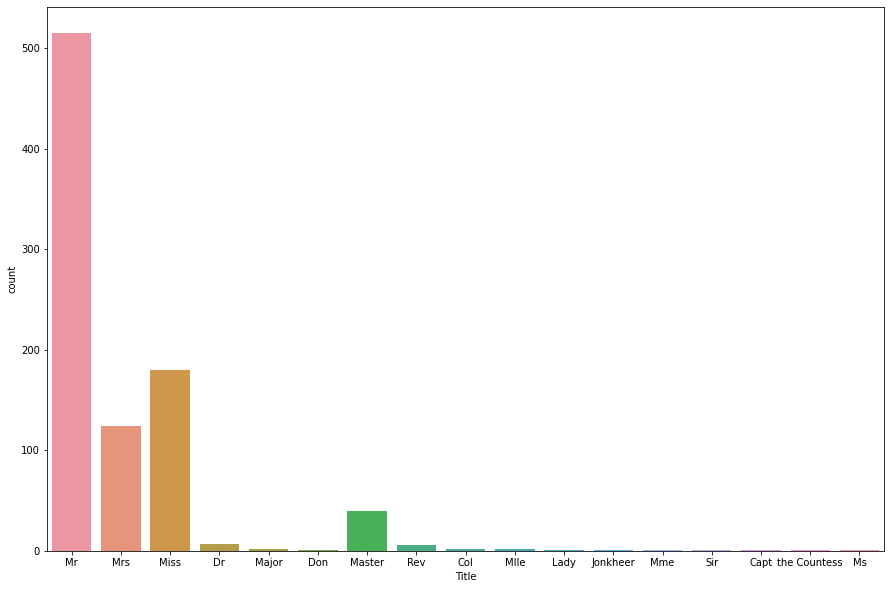

In [23]:
fig, axs = plt.subplots(figsize = (15,10))
sns.countplot(data['Title'], ax=axs)

c:\Users\YsPC\AppData\Local\Programs\Python\Python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Title', ylabel='Age'>

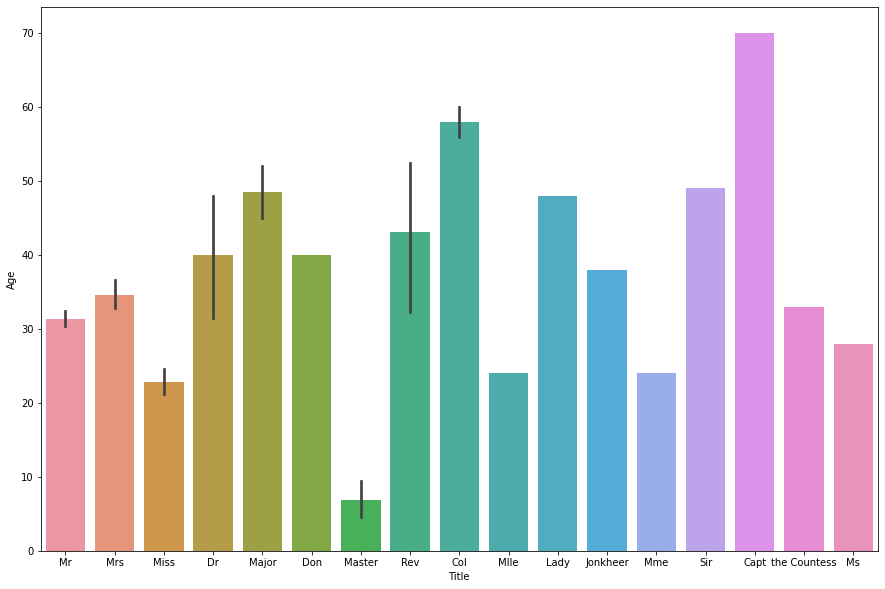

In [24]:
#sorted_by_age = data.sort_values(by= 'Age',ascending=True)
fig, axs = plt.subplots(figsize=(15,10))
sns.barplot(data["Title"],data['Age'], ax= axs)

c:\Users\YsPC\AppData\Local\Programs\Python\Python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Title', ylabel='Pclass'>

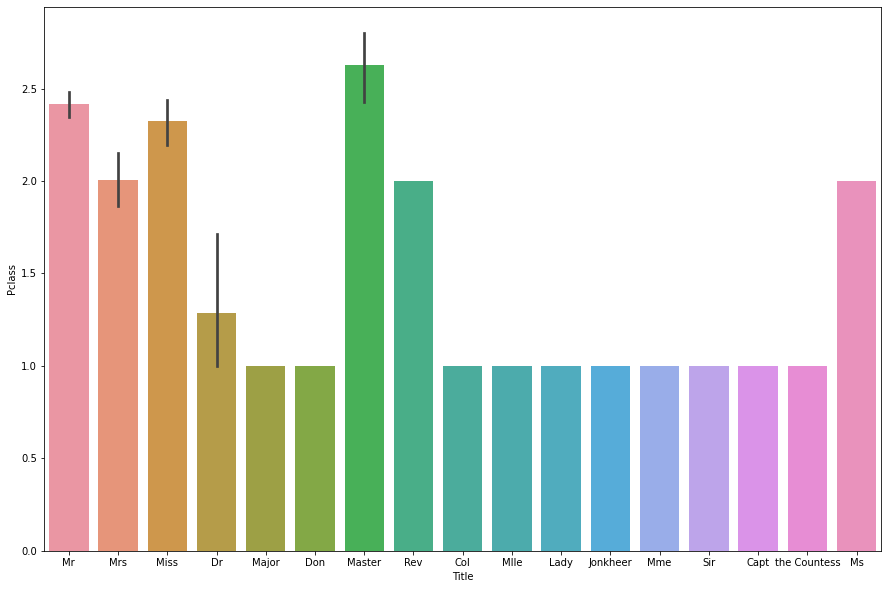

In [25]:
fig, axs = plt.subplots(figsize=(15,10))
sns.barplot(data["Title"],data['Pclass'], ax= axs)

c:\Users\YsPC\AppData\Local\Programs\Python\Python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Title', ylabel='Fare'>

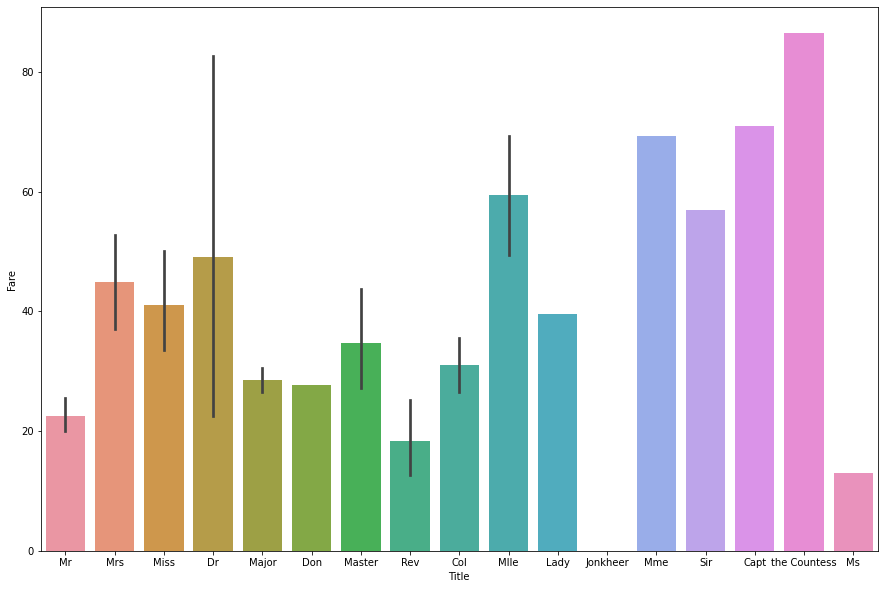

In [26]:
fig, axs = plt.subplots(figsize=(15,10))
sns.barplot(data["Title"],data['Fare'], ax= axs)

### Changing the titles

In [27]:
Title_Dictionary = {"Capt":"Officer",
                    "Col":"Officer",
                    "Major":"Officer",
                    "Dr":"Officer",
                    "Rev":"Officer",
                    "Jonkheer":"Royalty",
                    "Don":"Royalty",
                    "Sir":"Royalty",
                    "Lady":"Royalty",
                    "the Countess":"Royalty",
                    "Dona":"Royalty",
                    "Mme":"Miss",
                    "Mlle":"Miss",
                    "Miss":"Miss",
                    "Ms":"Mrs",
                    "Mr":"Mrs",
                    "Mrs":"Mrs",
                    "Master":"Master"
                    }

data['Title'] = data.Title.replace(Title_Dictionary)
# for x in Title_Dictionary.keys():
#         data['Title']=data.Title.str.replace(x, Title_Dictionary[x], regex=True)
data['Title'] = data['Title'].astype("string")
data.Title

0       Mrs
1       Mrs
2       Mrs
3       Mrs
4       Mrs
       ... 
886     Mrs
887     Mrs
888    Miss
889     Mrs
890    Miss
Name: Title, Length: 886, dtype: string

c:\Users\YsPC\AppData\Local\Programs\Python\Python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Title', ylabel='count'>

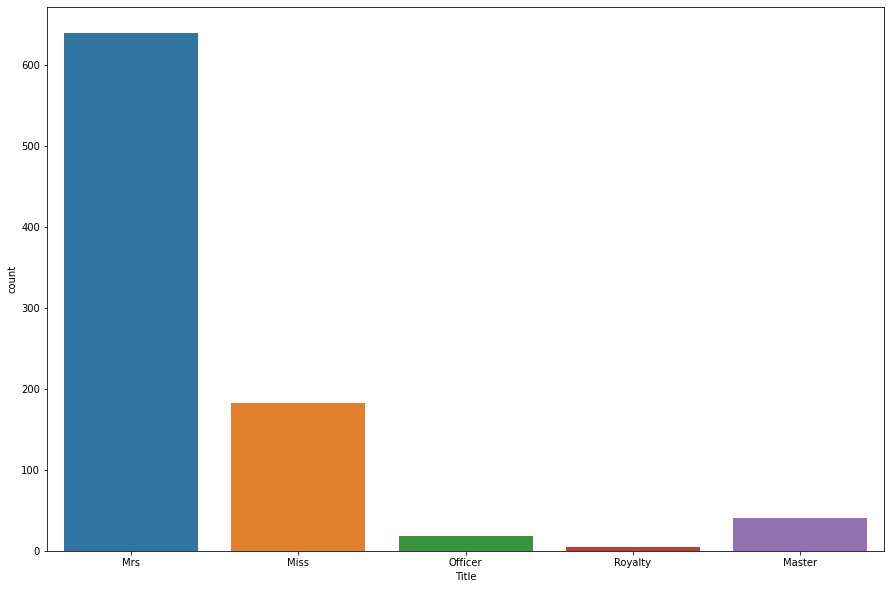

In [28]:
fig, axs = plt.subplots(figsize = (15,10))
sns.countplot(data['Title'], ax=axs)

c:\Users\YsPC\AppData\Local\Programs\Python\Python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Title', ylabel='Age'>

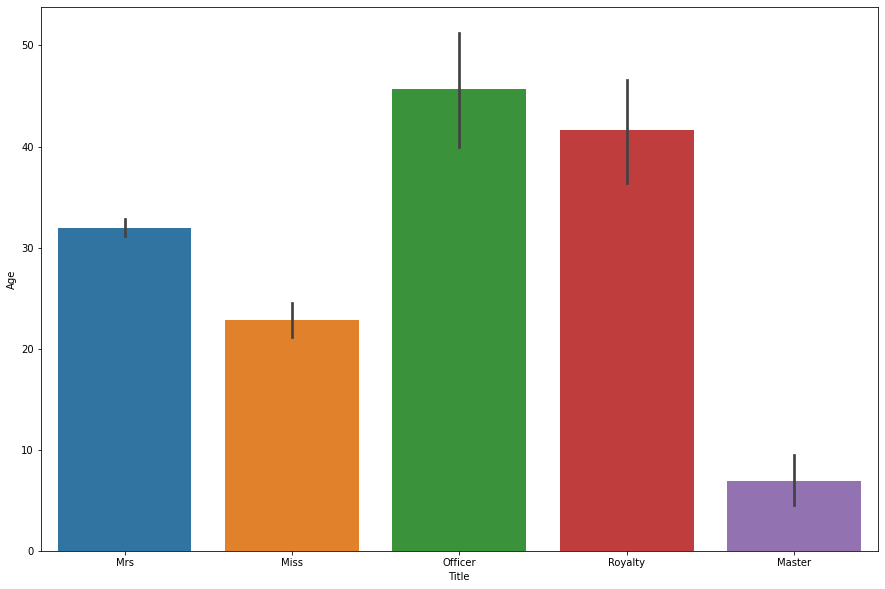

In [29]:
fig, axs = plt.subplots(figsize=(15,10))
sns.barplot(data["Title"],data['Age'], ax= axs)

c:\Users\YsPC\AppData\Local\Programs\Python\Python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Title', ylabel='Pclass'>

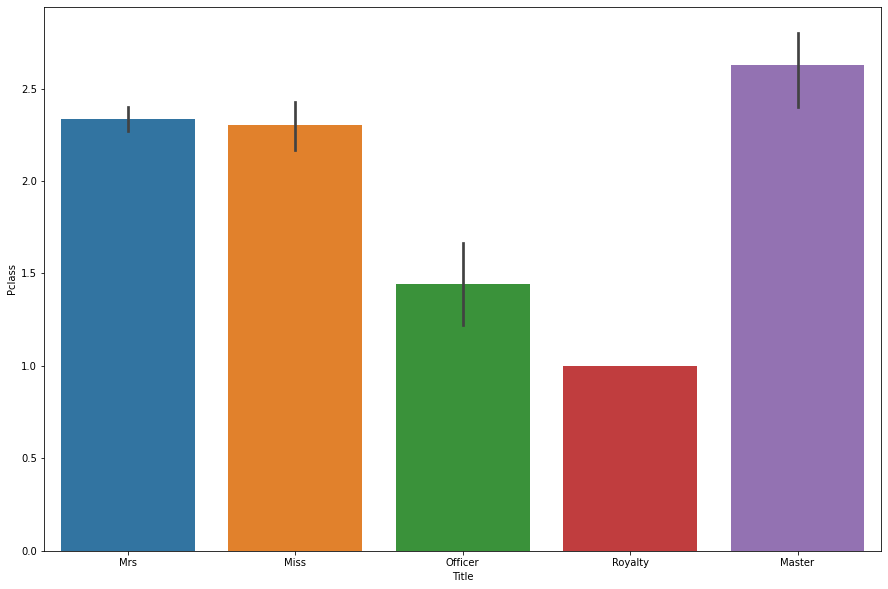

In [30]:
fig, axs = plt.subplots(figsize=(15,10))
sns.barplot(data["Title"],data['Pclass'], ax= axs)

c:\Users\YsPC\AppData\Local\Programs\Python\Python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Title', ylabel='Fare'>

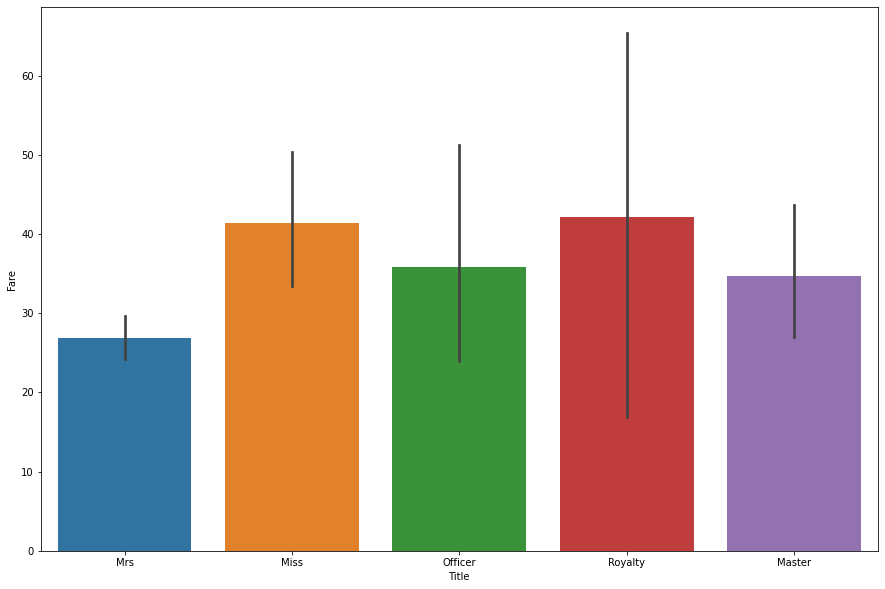

In [31]:
fig, axs = plt.subplots(figsize=(15,10))
sns.barplot(data["Title"],data['Fare'], ax= axs)

## Create FamilySize column

In [32]:
data['familySize'] = data.SibSp+data.Parch
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,familySize
0,343,0,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,248740,13.0000,B96 B98,S,Mrs,0
1,76,0,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,F G73,S,Mrs,0
2,641,0,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,350050,7.8542,B96 B98,S,Mrs,0
3,568,0,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,B96 B98,S,Mrs,4
4,672,0,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,B71,S,Mrs,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,B96 B98,C,Mrs,1
887,61,0,3,"Sirayanian, Mr. Orsen",male,22.0,0,0,2669,7.2292,B96 B98,C,Mrs,0
888,535,0,3,"Cacic, Miss. Marija",female,30.0,0,0,315084,8.6625,B96 B98,S,Miss,0
889,102,0,3,"Petroff, Mr. Pastcho (""Pentcho"")",male,28.0,0,0,349215,7.8958,B96 B98,S,Mrs,0


<AxesSubplot:xlabel='familySize', ylabel='Count'>

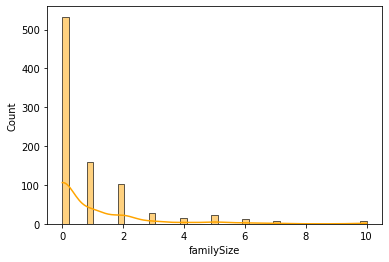

In [33]:
sns.histplot(data['familySize'],kde = True,color='orange')

<AxesSubplot:xlabel='familySize', ylabel='Fare'>

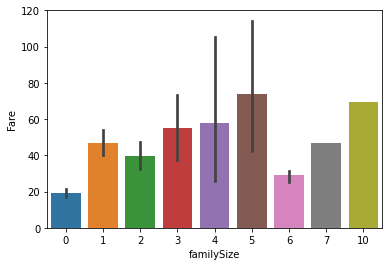

In [34]:
sns.barplot(x= data.familySize, y = data.Fare)

<AxesSubplot:xlabel='familySize'>

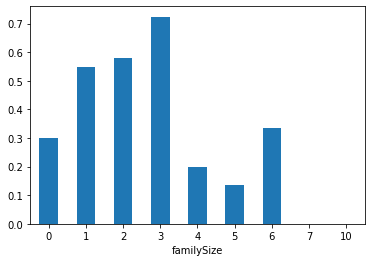

In [35]:
#urvival rate based on family size
data.groupby('familySize')['Survived'].mean().plot(kind = 'bar', rot=0)

,Age,Sex,Survived,familySize
0,28.0,1,0,0
1,25.0,1,0,0
2,20.0,1,0,0
3,29.0,0,0,4
4,31.0,1,0,1
...,...,...,...,...
886,14.0,0,1,1
887,22.0,1,0,0
888,30.0,0,0,0
889,28.0,1,0,0


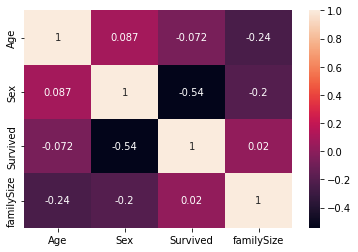

In [36]:
family_survival = data[{'Age', 'familySize', 'Survived', 'Sex'}].copy()
mapping = {'female': 0,
        'male': 1}

family_survival['Sex'] = family_survival['Sex'].map(mapping)
mapping = {'No': 0,
        'Yes': 1}
# family_survival['Survived'] = family_survival['Survived'].map(mapping)
fam_survival_corr = family_survival.corr()
sns.heatmap(fam_survival_corr, annot=True)
family_survival

##### We could conclude something from the plots, such as people with an average family size had the highest chances of survival, whereas people who traveled alone had less chances of surviving. However, we also observed that most of the passengers were traveling alone.


## Logistic Regression

In [37]:
## Imports
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

##### Feature selection

In [38]:
# we will be keeping only the most interesting features, thus we are choosing: pclass, sex, age. our label will be survived
# we must first convert the sex into numerical values
X = data[["Age", "Sex", "Pclass", "familySize"]]
X["Sex"] = X["Sex"].map({"male":1, "female":0})
Y = data["Survived"]
(X.shape, Y.shape)

C:\Users\YsPC\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


((886, 4), (886,))

In [39]:
# percentage split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=1234)

#get the model
model = LogisticRegression().fit(X_train, Y_train)
model.score(X_test,Y_test)

0.793233082706767

The confusion matrix

<AxesSubplot:>

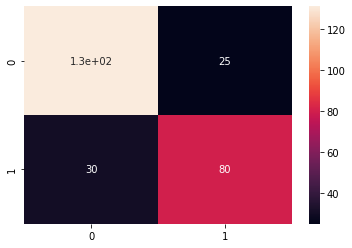

In [40]:
Y_predict = model.predict(X_test)
conf_mat = metrics.confusion_matrix(Y_test,Y_predict)
sns.heatmap(conf_mat, annot=True)

Metrics

In [46]:
print(f'Accuracy = {metrics.accuracy_score(Y_test, Y_predict)}')
print(f'Precision = {metrics.precision_score(Y_test, Y_predict)}')
print(f'Recall = {metrics.recall_score(Y_test, Y_predict)}')
print(f'R² = {metrics.r2_score(Y_test, Y_predict)}')

Accuracy = 0.793233082706767
Precision = 0.7619047619047619
Recall = 0.7272727272727273
R² = 0.14743589743589736


ROC curve

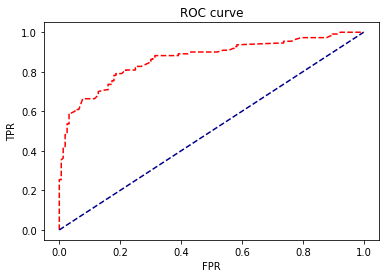

In [45]:
fpr, tpr, threshold = metrics.roc_curve(Y_test, model.predict_proba(X_test)[:,1])
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ROC curve")
plt.plot(fpr, tpr, linestyle= '--', color = "red")
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')


##### What is the ROC curve? and what does it represent?

The ROC curve is a plot that helps us visualize and validate our model through the confusion matrix, using 2 distinct metric: the FPR and TPR. <br>
The parameters fed into the plotting of the ROC curve are the correct labels of the test set, and the probabilities of the predicted labels of the same test set. <br><br>
In each iteration, we set a threshold, ranging between 0 and 1. We will create a confusion matrix in each of these iterations, by comparing the True label values and the probability values according to our current iteration's classification threshold. Once the matrix is complete, we can calculate the True Positive rate, which will be our Y axis in the curve, and our False Positive Rate, which will be our X axis in the curve. We keep iterating until the threshold hits 1.<br><br>
The loop is complete and we now have an array of FPR values and TPR values, we can proceed with plotting the ROC curve as seen above.

AUC score

In [47]:
auc = metrics.roc_auc_score(Y_test, model.predict_proba(X_test)[:,1])
print(f'The AUC score = {auc}')

The AUC score = 0.8656759906759908


The AUC is basically the Area Under the Curve, the curve being the ROC curve. <br>
A simple way of interpreting this value is the probability that the model ranks a random positive (1 label) instance more highly than a random negative (0 label) instance.